Desafio 14
VInicius F. - 276008

In [12]:
import polars as pl
from plotnine import *

In [10]:
diamonds = pl.read_csv("/diamonds.csv.gz")

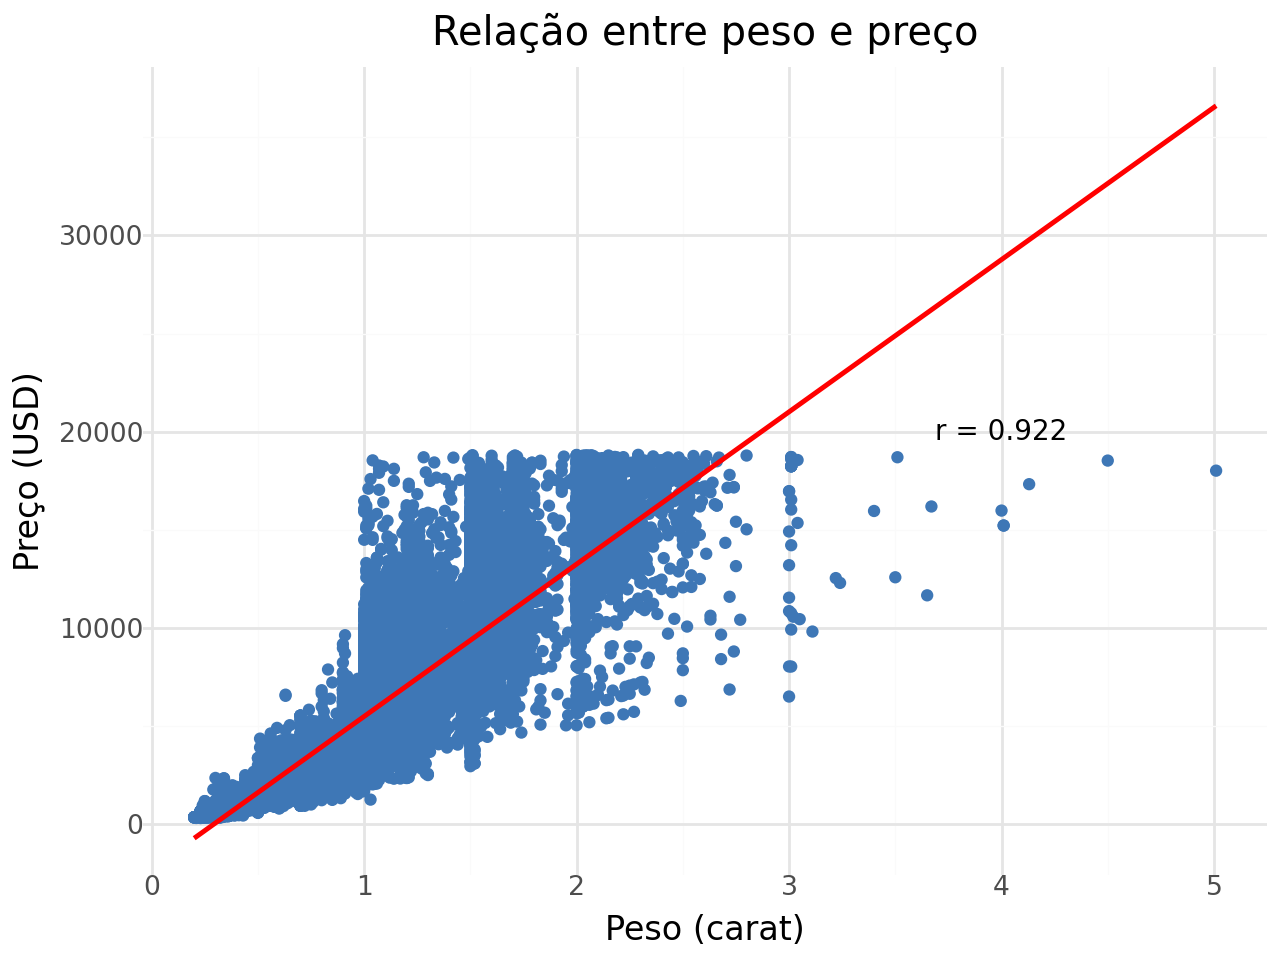

In [42]:
# Grafico da relação entre peso e preço dos diamantes. Foi escolhido o grafico
# de dispersão devido a boa representação visual da correlação entre duas variaveis
# numéricas, além disso, foi adicionada a linha de regressão linear entre as variaveis
# e o valor da correlação escolhida. As cores e rótulos também foram selecionadas
# com propósito de facilitar a visualização e o entendimento

# Correlação de pearson
from scipy.stats import pearsonr
r, correlation = pearsonr(diamonds["carat"], diamonds["price"])

graph1 = (
  ggplot(diamonds, aes("carat", "price")) +
  geom_point(color="#3E77B6") +
  geom_smooth(method = "lm", se=True, fullrange=False, color="red") +
  annotate("text", x=4, y=20000,
        label=f"r = {r:.3f}",
        size=10, color="black") +
  labs(title = "Relação entre peso e preço",
        x="Peso (carat)",
        y="Preço (USD)") +
  theme_minimal(base_size=12)
)
graph1

# Pela analise do gráfico e do valor do coeficiente de correlação
# é claro como quanto maoir o peso do diamante, mais caro ele é. Porém
# há um limite no preço mesmo aumentando o peso

/tmp/ipython-input-226878797.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


cut
Fair         0.859
Good         0.922
Ideal        0.931
Premium      0.925
Very Good    0.926
dtype: float64


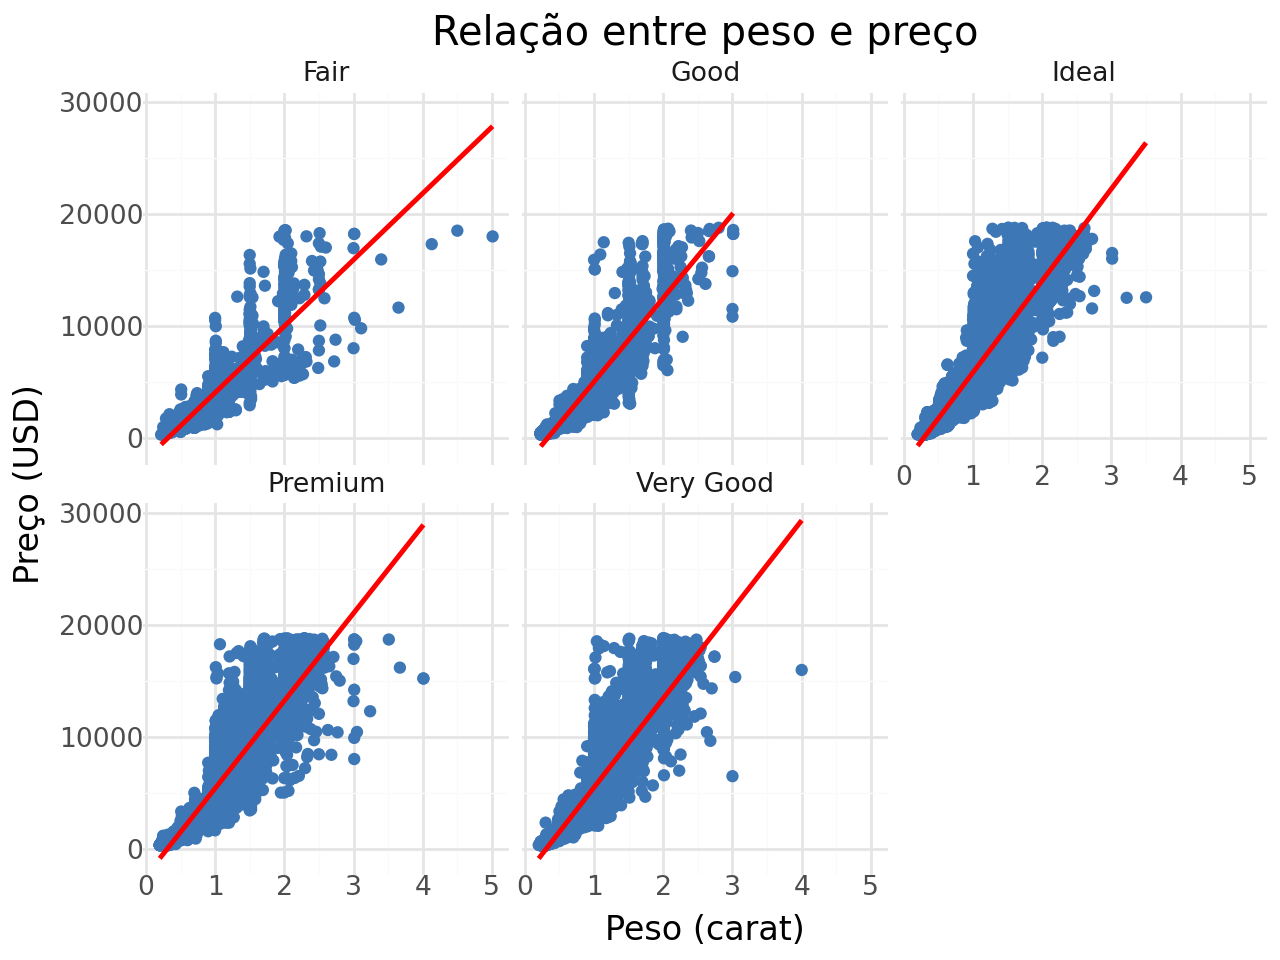

In [70]:
# Para verificar a correlação entre os cortes, faz-se os mesmos tipos de gráficos
# do anterior, porém agrupando agora por corte


# Coeficiente de correlação
import pandas as pd

diamonds_pd = diamonds.to_pandas()
r_por_cut = (
    diamonds_pd.groupby("cut")
    .apply(lambda df: pearsonr(df["carat"], df["price"])[0])
    .round(3)
)

(
  ggplot(diamonds, aes("carat", "price", color = "cut")) +
  facet_wrap("cut") +
  geom_point(color="#3E77B6") +
  geom_smooth(method = "lm", se=False, color="red") +
  #annotate("text", x=4, y=20000,
   #     label=f"r = {r:.3f}",
   #     size=10, color="black") +
  labs(title = "Relação entre peso e preço por corte",
        x="Peso (carat)",
        y="Preço (USD)",
        color = "Corte") +
  theme_minimal(base_size=12)
)

print(r_por_cut)
graph2

# Analisando os graficos separados por corte é nitido que a correlação se mantém
# para todos os cortes, apenas com um decrescimo na pior qualidade de diamante

/tmp/ipython-input-1626472788.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/tmp/ipython-input-1626472788.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


color
D    0.901
E    0.914
F    0.911
G    0.929
H    0.942
I    0.952
J    0.952
dtype: float64
clarity
I1      0.949
IF      0.929
SI1     0.957
SI2     0.954
VS1     0.950
VS2     0.952
VVS1    0.940
VVS2    0.948
dtype: float64


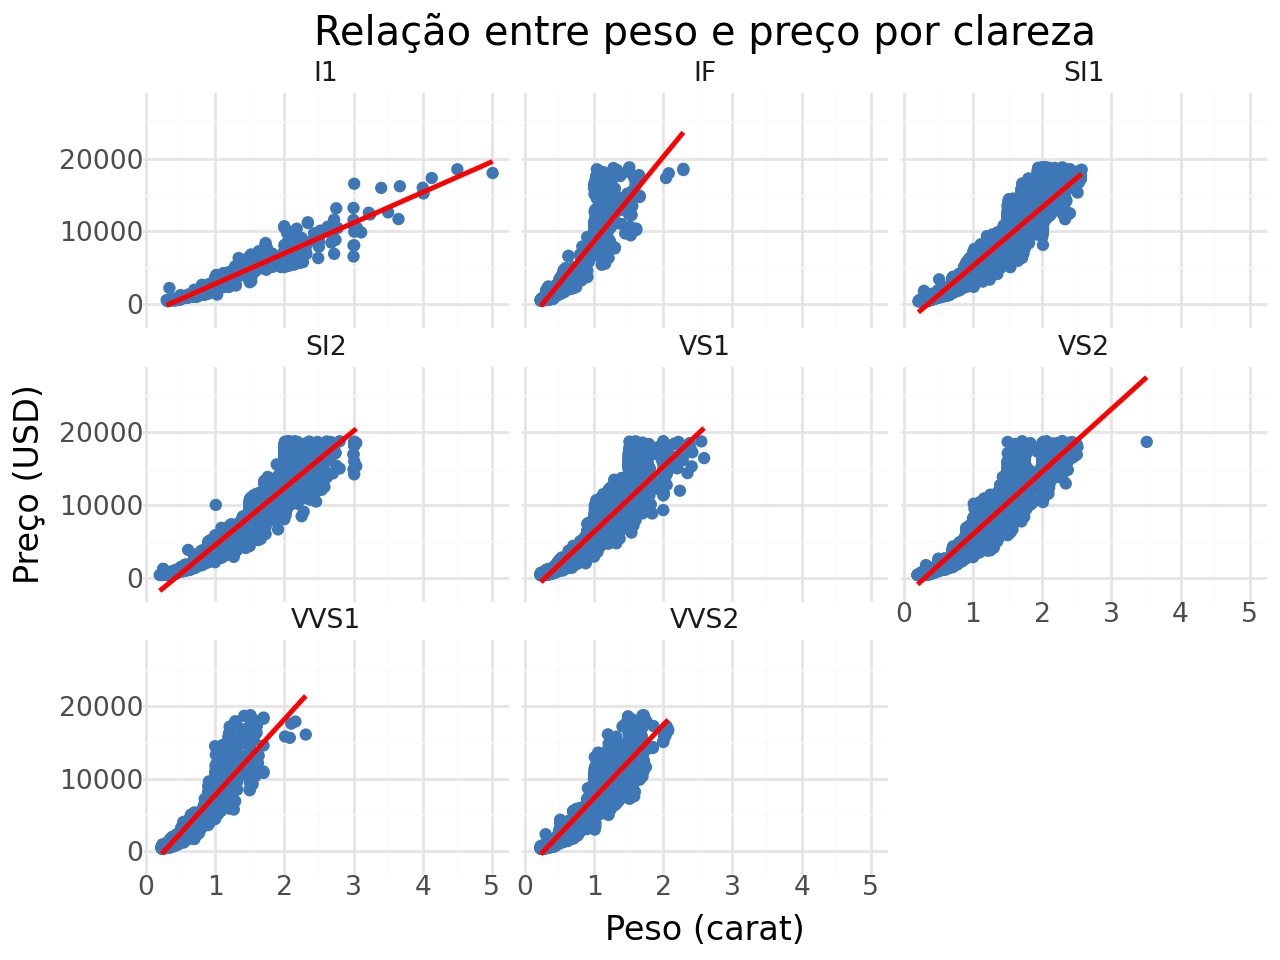

In [78]:
# Graficos de correlação por cor e clareza

r_por_cor = (
    diamonds_pd.groupby("color")
    .apply(lambda df: pearsonr(df["carat"], df["price"])[0])
    .round(3)
)
r_por_clareza = (
    diamonds_pd.groupby("clarity")
    .apply(lambda df: pearsonr(df["carat"], df["price"])[0])
    .round(3)
)

graph3_1 = (
  ggplot(diamonds, aes("carat", "price", color = "color")) +
  facet_wrap("color") +
  geom_point(color="#3E77B6") +
  geom_smooth(method = "lm", se=False, color="red") +
  #annotate("text", x=4, y=20000,
   #     label=f"r = {r:.3f}",
   #     size=10, color="black") +
  labs(title = "Relação entre peso e preço por cor",
        x="Peso (carat)",
        y="Preço (USD)",
        color = "Cor") +
  theme_minimal(base_size=12)
)

graph3_2 = (
  ggplot(diamonds, aes("carat", "price", color = "clarity")) +
  facet_wrap("clarity") +
  geom_point(color="#3E77B6") +
  geom_smooth(method = "lm", se=False, color="red") +
  #annotate("text", x=4, y=20000,
   #     label=f"r = {r:.3f}",
   #     size=10, color="black") +
  labs(title = "Relação entre peso e preço por clareza",
        x="Peso (carat)",
        y="Preço (USD)",
        color = "clareza") +
  theme_minimal(base_size=12)
)

print(r_por_cor)
graph3_1

print(r_por_clareza)
graph3_2

# Os dois agrupamentos mostraram forte correlação, sendo até maior que quando
# agrupado por corte. Além disso, a cor mostra um decrescimento das correlações
# em relação a qualidade da cor, D, a melhor cor, tem a menor correlação que vai
# aumentando até chegar na melhor correlação, J, a pior cor. Para clareza não
# há linearidade visível